In [3]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('wineQT.csv')

# Display the first few rows of the DataFrame
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [4]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., fill with mean)
df.fillna(df.mean(), inplace=True)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [11]:
# Select features for clustering (you can choose relevant columns)
features = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]


In [27]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the features
scaled_features = scaler.fit_transform(features)

#

In [28]:
from sklearn.cluster import KMeans

# Choose the number of clusters (k)
k = 3

# Initialize KMeans object
kmeans = KMeans(n_clusters=k)

# Fit KMeans to the standardized features
kmeans.fit(scaled_features)

# Get cluster labels
cluster_labels = kmeans.labels_


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


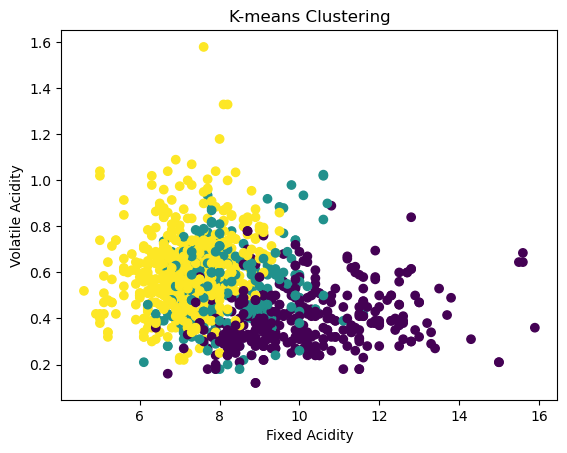

In [29]:
import matplotlib.pyplot as plt

# Visualize clusters
plt.scatter(features['fixed acidity'], features['volatile acidity'], c=cluster_labels, cmap='viridis')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.title('K-means Clustering')
plt.show()


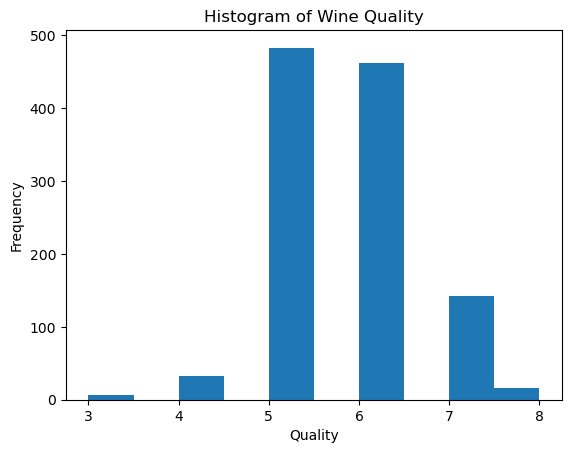

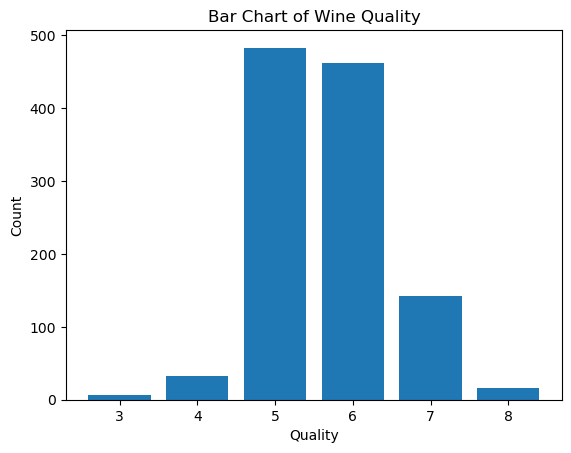

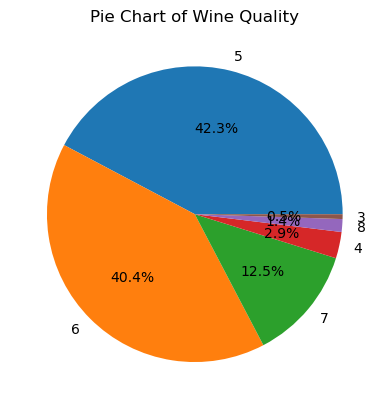

In [30]:
# Histogram
plt.hist(df['quality'], bins=10)
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Histogram of Wine Quality')
plt.show()

# Bar chart
plt.bar(df['quality'].value_counts().index, df['quality'].value_counts())
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Bar Chart of Wine Quality')
plt.show()

# Pie chart
plt.pie(df['quality'].value_counts(), labels=df['quality'].value_counts().index, autopct='%1.1f%%')
plt.title('Pie Chart of Wine Quality')
plt.show()


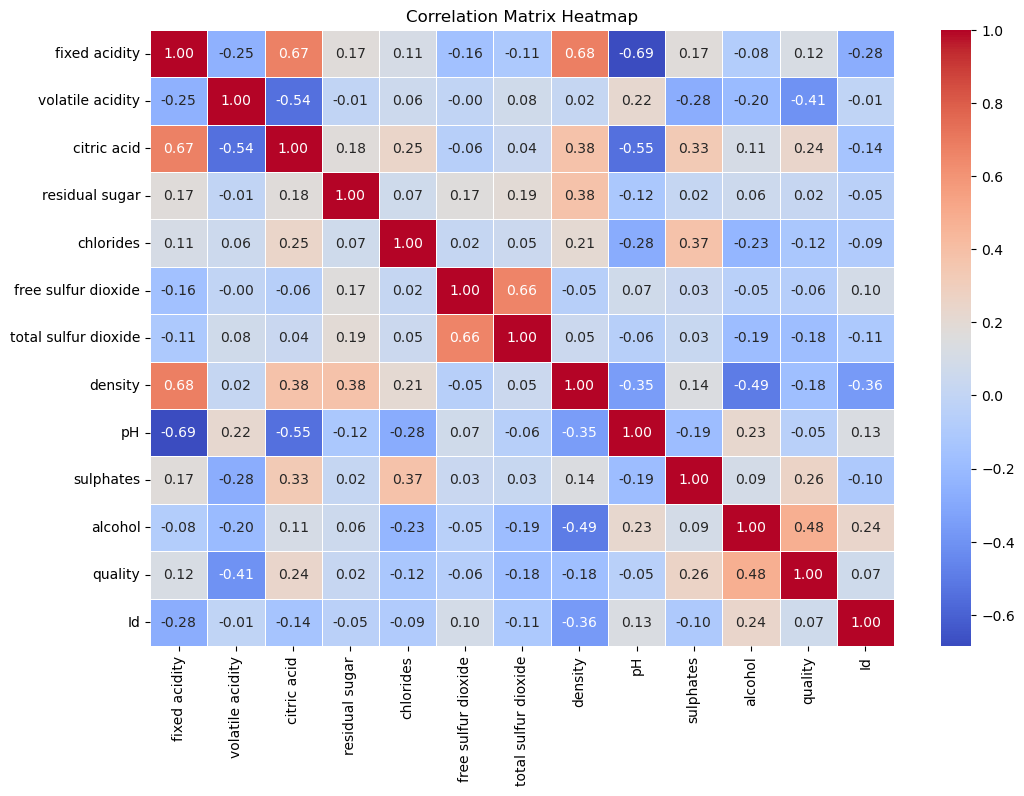

In [37]:
# Code to generate confusion matrix, heatmap, corner plot, box plot, or violin plot (choose one based on your analysis)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
wine_df = pd.read_csv('wineQT.csv')

# Calculate the correlation matrix
correlation_matrix = wine_df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

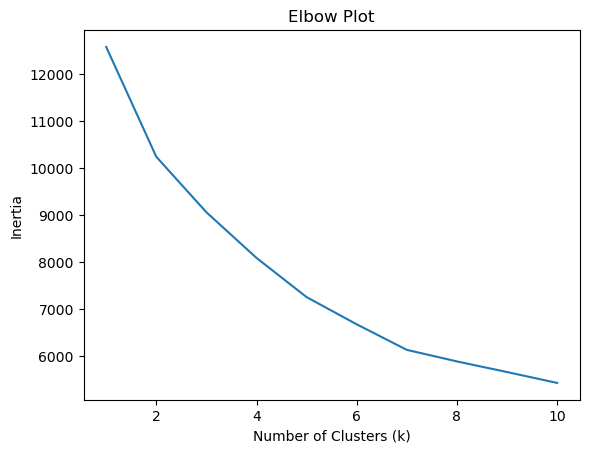

Silhouette Score Average: 0.07791772660964692


In [40]:
# Elbow plot
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

# Silhouette plot (after performing clustering) at which k value is optimal
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print('Silhouette Score Average:', silhouette_avg)


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


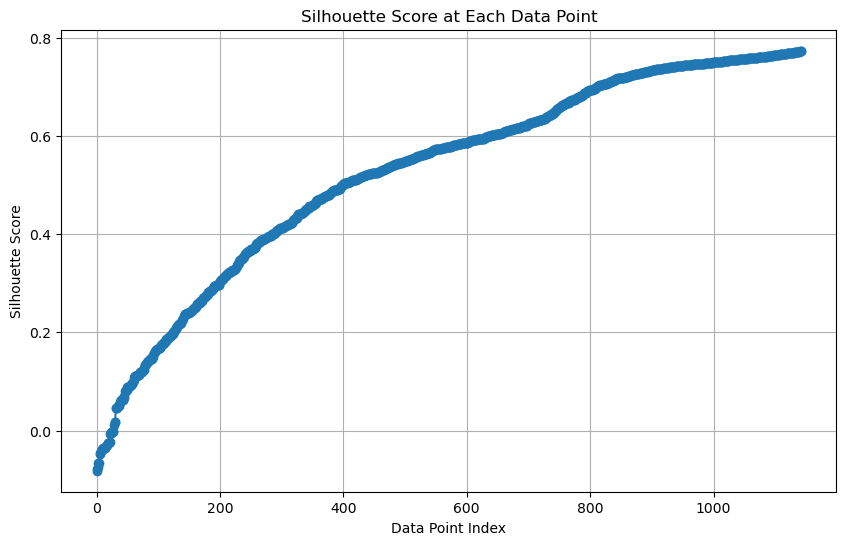

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

# Load the dataset
wine_df = pd.read_csv('wineQT.csv')

# Select features for clustering
X = wine_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
             'density', 'pH', 'sulphates', 'alcohol']]

# Initialize KMeans object
kmeans = KMeans(n_clusters=3, random_state=42)  # Specify the number of clusters (k)

# Fit the model to the data
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Calculate silhouette score for each point
silhouette_scores = silhouette_samples(X, cluster_labels)

# Plot silhouette scores for each point
plt.figure(figsize=(10, 6))
plt.plot(sorted(silhouette_scores), marker='o', linestyle='-')
plt.xlabel('Data Point Index')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score at Each Data Point')
plt.grid(True)
plt.show()


In [32]:
#descriptive statistic

import pandas as pd

# Load the dataset
wine_df = pd.read_csv('wineQT.csv')

# Display basic statistics
print("Descriptive Statistics:")
print(wine_df.describe())

# Calculate measures of central tendency
print("\nMeasures of Central Tendency:")
print("Mean:")
print(wine_df.mean())
print("\nMedian:")
print(wine_df.median())
print("\nMode:")
print(wine_df.mode().iloc[0])

# Calculate measures of variability
print("\nMeasures of Variability:")
print("Standard Deviation:")
print(wine_df.std())
print("\nVariance:")
print(wine_df.var())
print("\nRange:")
print(wine_df.max() - wine_df.min())
print("\nInterquartile Range:")
print(wine_df.quantile(0.75) - wine_df.quantile(0.25))


Descriptive Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000      

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into features (X) and target variable (y)
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
              'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LinearRegression object
regression_model = LinearRegression()

# Fit the model to the training data
regression_model.fit(X_train, y_train)

# Make predictions
y_pred = regression_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.38003245026277593


In [34]:
#linear regression fitting
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.4773398352588605
Root Mean Squared Error (RMSE): 0.616467720373724
R-squared (R2): 0.3170693672733116


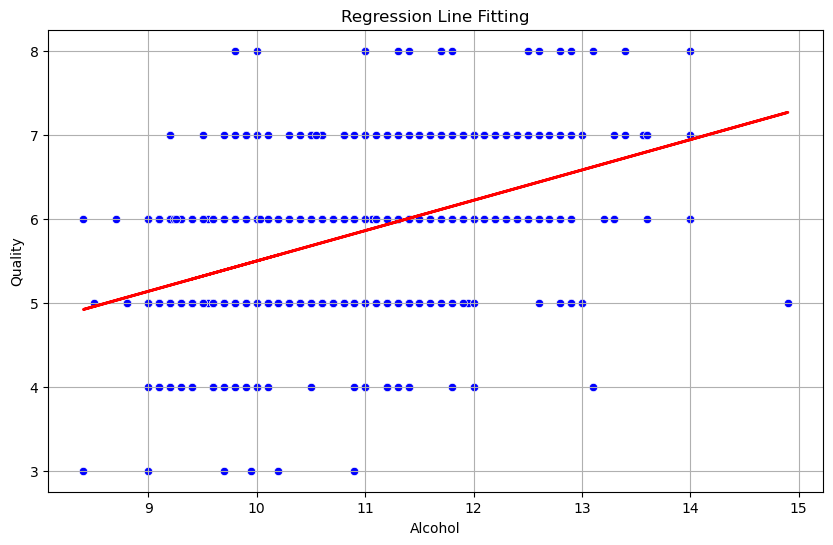

In [38]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
wine_df = pd.read_csv('wineQT.csv')

# Select the feature and target variable
X = wine_df[['alcohol']]
y = wine_df['quality']

# Fit the linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Plot the data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='quality', data=wine_df, color='blue')

# Plot the regression line
plt.plot(X, regression_model.predict(X), color='red', linewidth=2)

# Customize the plot
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Regression Line Fitting')
plt.grid(True)
plt.show()


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


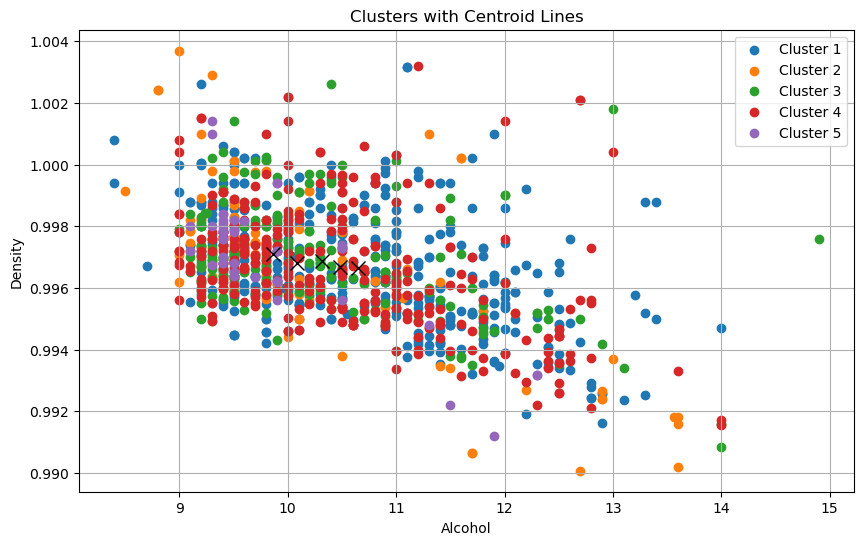

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('wineQT.csv')

# Select features for clustering
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
             'density', 'pH', 'sulphates', 'alcohol']]

# Initialize KMeans object for multiple clusters
num_clusters = 5  # Number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Plot the clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    cluster_points = X[kmeans.labels_ == i]
    plt.scatter(cluster_points['alcohol'], cluster_points['density'], label=f'Cluster {i+1}')
    
    # Draw a line through each cluster's centroid
    plt.plot(centroids[i][10], centroids[i][7], marker='x', color='black', markersize=10)

# Customize the plot
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.title('Clusters with Centroid Lines')
plt.legend()
plt.grid(True)
plt.show()
